#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Name: Sofija GRANET
## Username: sofijag

## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 28 2025, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


In [4]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
print(data) 

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


[['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw'], ['0.0', '1528.13', '1497.61', '1062.89', '1968.42', '1498.79', '1757.54', '1469.29', '1471.78', '2230.42', '2391.06', '1137.67', '504.64', '725.12', '3006.93', '1054.55', '831.59', '1353.90', '856.69', '2813.02', '1745.55', '2276.51', '1347.43', '1862.33'], ['1528.13', '0', '999.25', '1372.59', '447.34', '316.41', '1327.24', '2145.39', '1229.93', '809.48', '976.02', '1688.97', '2026.94', '885.32', '1710.99', '773.33', '1445.70', '738.10', '721.55', '1797.75', '329.46', '1620.96', '489.28', '826.66'], ['1497.61', '999.25', '0', '651.62', '1293.40', '689.06', '354.03', '1315.16', '254.51', '1735.01', '1204.00', '929.97', '1867.69', '840.72', '1607.99', '501.97', '876.96', '280.34', '1181.67', '1319.62', '1318.67', '810.38', 

In [5]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Paris', 'Berlin']


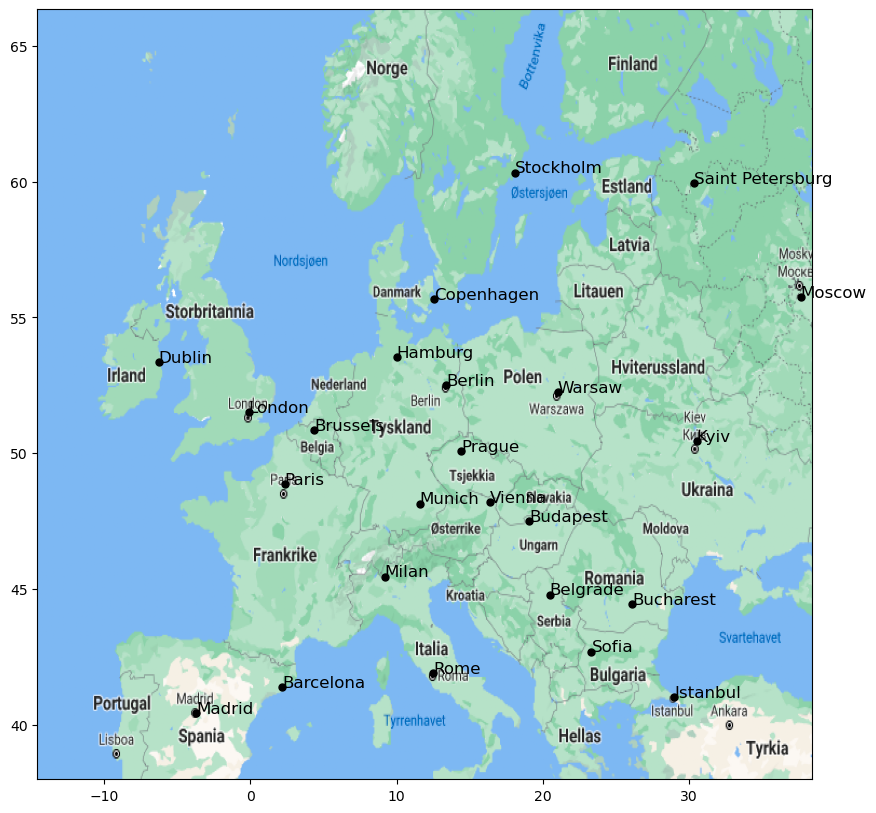

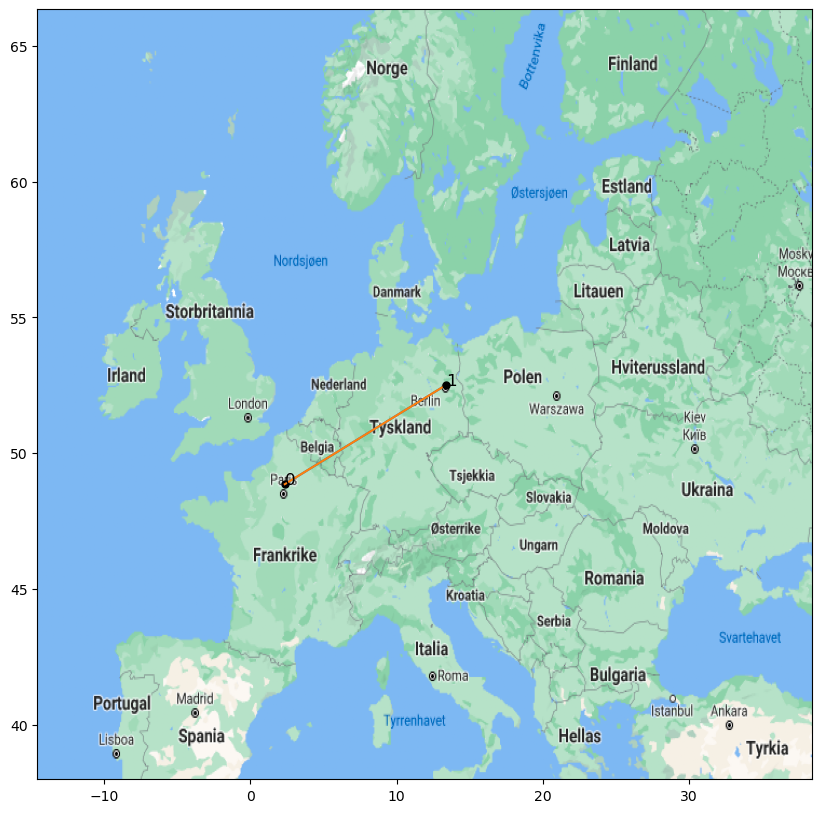

In [6]:
#Example usage of the plotting-method.
plan = ['Paris', 'Berlin']
#plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
#plan = ['Barcelona', 'Berlin', 'Rome', 'Paris']
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

### Functions

In [7]:
## Exhaustive search algorithm ##
import itertools #for permutations 
import time #for time measuring

#creating dictionary from data (list of lists)
distances:dict = {}
for i in range(1, len(data)): #starting from 1 because 0 is city names
    city1 = cities[i-1]
    for j in range(1, len(data[i])):
        city2 = cities[j] 
        distances[(city1, city2)] = float(data[i][j])  # distance as float instead of string
#print(distances)

def tour_distance(tour, distances):
    """returns the total distance for tour"""
    total = 0
    for i in range(len(tour)-1):
        total += (distances.get((tour[i], tour[i+1])) or distances.get((tour[i+1], tour[i])))

    # from last city of tour to first one
    #print("tour[-1]: "+str(tour[-1])) 
    #print("tour[-1]: "+str( tour[0]))
    total += (distances.get((tour[-1], tour[0])) or distances.get((tour[0], tour[-1]))) 
    return total

def tour_distance_test(tour, distances):
    """tests tour_distance function"""
    print("The distance for this tour is "+str(tour_distance(tour, distances)))

def exhaustive_search(cities, distances):
    """determines the shortest tour using exhaustive search"""
    shortest_tour = None
    shortest_distance = float("inf")
    
    start_time = time.time()

    for permutation in itertools.permutations(cities):
        dist = tour_distance(permutation, distances)
        if dist < shortest_distance:
            shortest_tour = permutation
            shortest_distance = dist
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    return shortest_tour, shortest_distance, execution_time

### Tests and runs

Testing tour_distance function
The distance for this tour is 2995.22
subset of 6 cities
Shortest tour: ('Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels')
Shortest distance: 5018.8099999999995
Execution time: 0.032196044921875 seconds


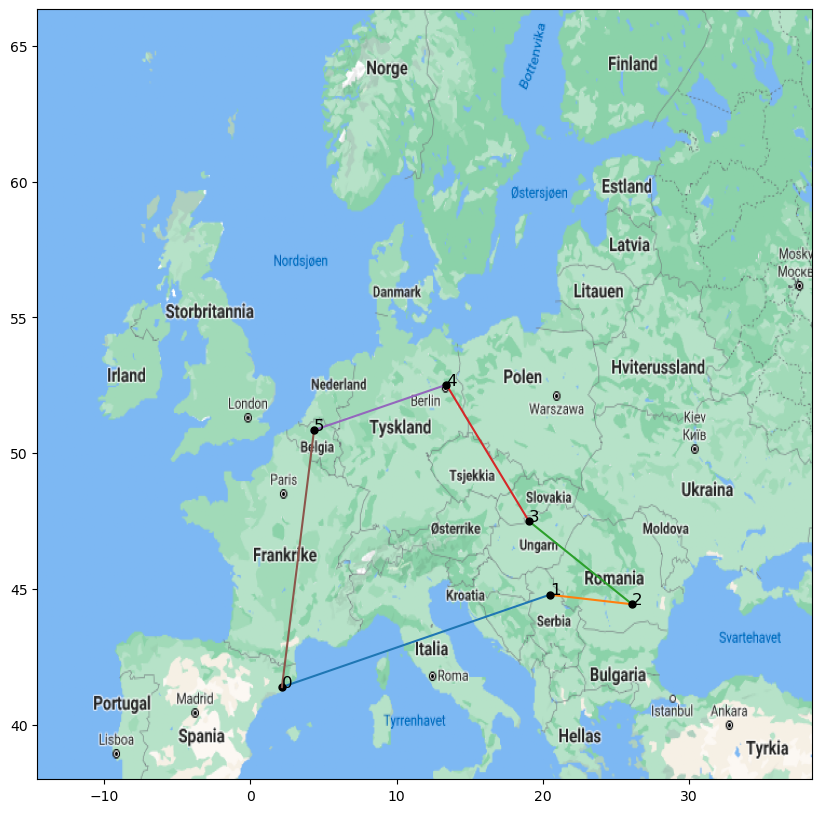

subset of 10 cities
Shortest tour: ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')
Shortest distance: 7486.309999999999
Execution time: 8.344206809997559 seconds


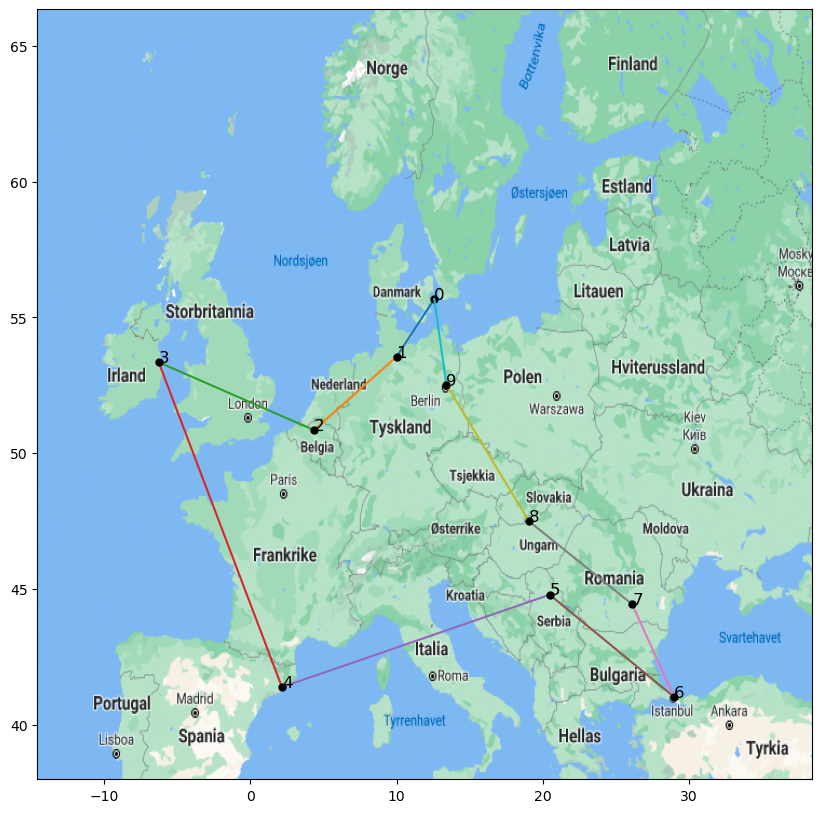

In [12]:
#expected output: 2995.22
print("Testing tour_distance function")
tour_distance_test(['Berlin', 'Barcelona'], distances) 

### subset of 6 cities
print("subset of 6 cities")
subset = data[0][:6]
shortest_tour, shortest_distance, exec_time = exhaustive_search(subset, distances)

print("Shortest tour:", shortest_tour)
print("Shortest distance:", shortest_distance)
print("Execution time:", exec_time, "seconds")

plot_plan(shortest_tour)

### subset of 10 cities
print("subset of 10 cities")
subset = data[0][:10]
shortest_tour, shortest_distance, exec_time = exhaustive_search(subset, distances)

print("Shortest tour:", shortest_tour)
print("Shortest distance:", shortest_distance)
print("Execution time:", exec_time, "seconds")

plot_plan(shortest_tour)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

### Shortest tour
The shortest tour among the first 10 cities is Copenhagen, Hamburg, Brussels, Dublin, Barcelona, Belgrade, Istanbul, Bucharest, Budapest, Berlin and is 7486.309999999999 km long. The program took 8.344206809997559 seconds to find it. 
### Approximation of necessary time to perform exhaustive search on all 24 cities
Exhaustive search having a time complexity of O(n!), since it needs to evaluate n! solutions, and taking 8.34 seconds for 10 cities, we multiply it by 24!/10!. We then get 1.43×10^18 seconds.

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you should run the algorithm several times to measure its performance. Report the length of the tour of the best, worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

### Functions

In [16]:
import random

def random_tour(cities):
    """generates a random tour"""
    tour = cities[:]
    random.shuffle(tour)
    return tour

def swap(tour):
    """swaps two random cities, thus creating a new tour"""
    new = tour[:]
    i, j = random.sample(range(len(tour)), 2)
    new[i], new[j] = new[j], new[i]
    return new

def hill_climbing(cities, distances, max_iterations=10000):
    current_tour = random_tour(cities)
    current_distance = tour_distance(current_tour, distances)

    for _ in range(max_iterations):
        new_tour = swap(current_tour)
        new_distance = tour_distance(new_tour, distances)

        # if the neighbor is better, replace the current best
        if new_distance < current_distance:
            current_tour, current_distance = new_tour, new_distance
    
    return current_tour, current_distance

def run_hill_climbing(cities, distances, num_runs=20):
    """running hill_climbing multiple times and return statistics"""
    results = []
    best_tour = []

    for _ in range(num_runs):
        tour, dist = hill_climbing(cities, distances)
        results.append(dist)
        if dist <= min(results):
            best_tour = tour

    best = min(results)
    worst = max(results)
    mean = np.mean(results)
    std_dev = np.std(results)

    return best, worst, mean, std_dev, results, best_tour

### Running 

10 Cities - Best: 7486.309999999999, Worst: 8349.94, Mean: 7584.8565, Std Dev: 200.82463826122046


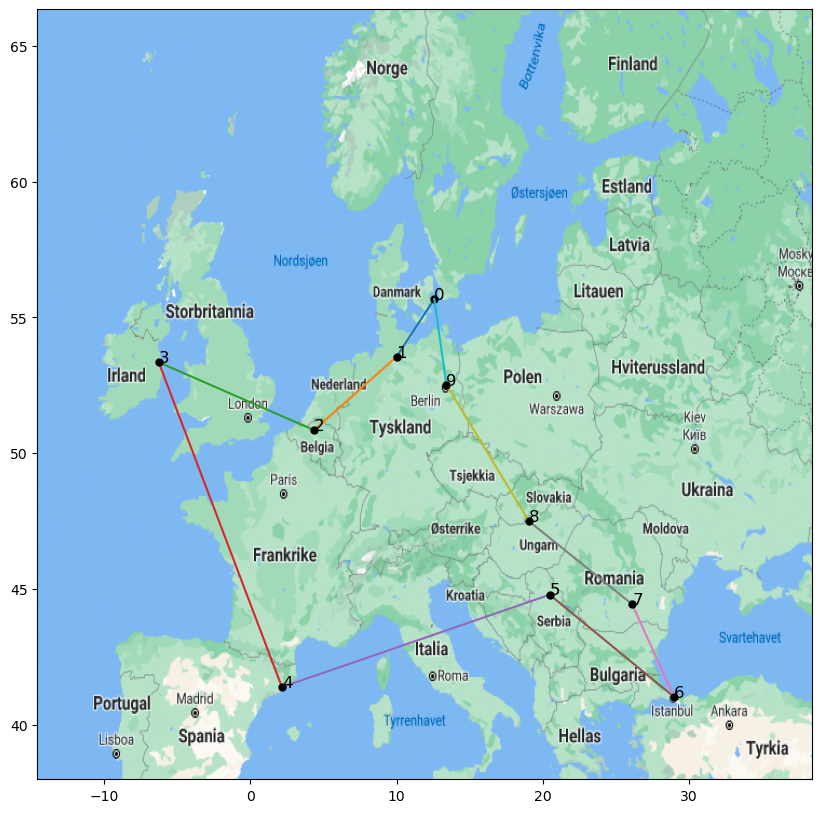

24 Cities - Best: 13573.36, Worst: 17247.26, Mean: 14704.0155, Std Dev: 890.1052464370439


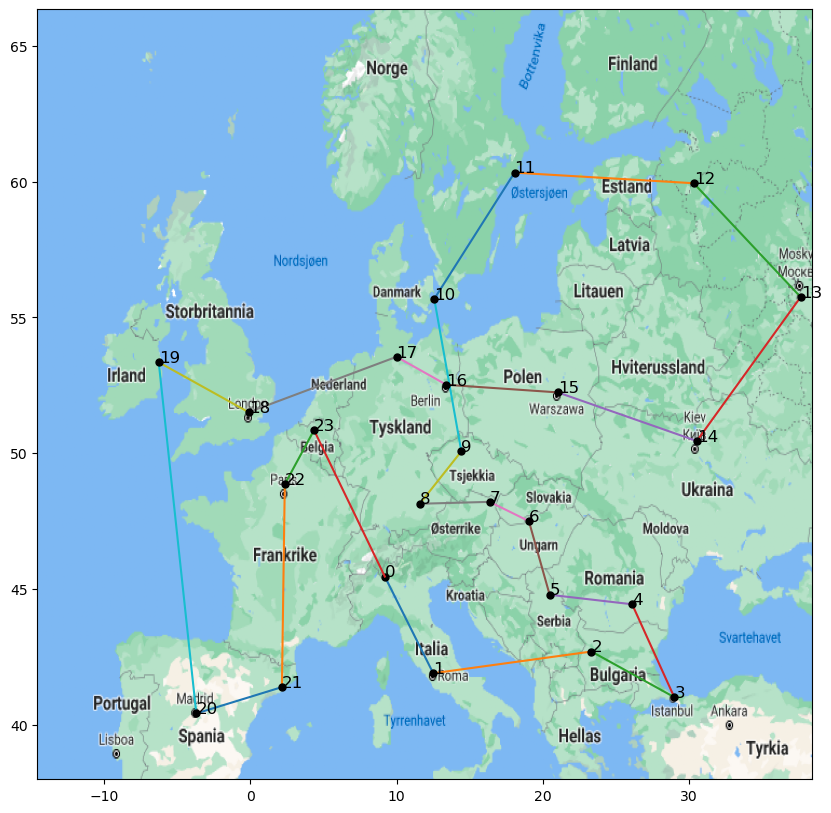

In [17]:
# hill_climbing() for 10 cities
best_10, worst_10, mean_10, std_dev_10, results_10, tour_10 = run_hill_climbing(data[0][:10], distances)
print(f"10 Cities - Best: {best_10}, Worst: {worst_10}, Mean: {mean_10}, Std Dev: {std_dev_10}")
plot_plan(tour_10)

# hill_climbing() for 24 cities
best_24, worst_24, mean_24, std_dev_24, results_24, tour_24 = run_hill_climbing(data[0], distances)
print(f"24 Cities - Best: {best_24}, Worst: {worst_24}, Mean: {mean_24}, Std Dev: {std_dev_24}")
plot_plan(tour_24)


For the first 10 cities, the hill climbing algorithm performs just as well as exhaustive search, finding the same tour as a result.

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

## Functions

In [42]:
def order_crossover(parent1, parent2):
    """order crossover between two parents"""
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    offspring = [None] * size # placeholder for offspring
    offspring[start:end] = parent1[start:end]
    
    parent2_items = [item for item in parent2 if item not in offspring]
    index = 0
    for i in range(size):
        if offspring[i] is None:
            offspring[i] = parent2_items[index]
            index += 1
    return offspring

def swap_mutation(tour, mutation_rate=0.1):
    """perform swap mutation"""
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

def tournament_selection(population, distances, k=3):
    """selecting parent using tournament selection"""
    return min(random.sample(population, k), key=lambda tour: tour_distance(tour, distances))

def genetic_algorithm(cities, distances, pop_size, generations=500, mutation_rate=0.1):
    population = [random_tour(cities) for _ in range(pop_size)]
    best_fitness_per_gen = []
    
    start_time = time.time()

    for _ in range(generations):
        new_population = []
        #elitism
        elite = min(population, key=lambda tour: tour_distance(tour, distances)) 
        
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, distances)
            parent2 = tournament_selection(population, distances)
            offspring = order_crossover(parent1, parent2)
            offspring = swap_mutation(offspring, mutation_rate)
            new_population.append(offspring)
        
        population = new_population

        # keep best one 
        population[0] = elite  
        best_fitness_per_gen.append(tour_distance(elite, distances))
    
    end_time = time.time()
    execution_time = end_time - start_time

    best_tour = min(population, key=lambda tour: tour_distance(tour, distances))
    return best_tour, tour_distance(best_tour, distances), best_fitness_per_gen, execution_time

def run_genetic_algorithm(num_runs, cities, distances, pop_sizes, generations=500, mutation_rate=0.1):
    results = {}
    best_tour = []

    for p in pop_sizes:
        # print('Now calculating population size =',p, '...')
        fitness_curves = []
        list_distances = []
        exec_times = []
        
        for _ in range(num_runs):
            tour, dist, fitness, exec_time = genetic_algorithm(cities, distances, p, generations, mutation_rate)
            fitness_curves.append(fitness)
            list_distances.append(dist)
            exec_times.append(exec_time)
            if dist <= min(list_distances):
                best_tour = tour
        
        results[p] = {
            "best": min(list_distances),
            "worst": max(list_distances),
            "mean": np.mean(list_distances),
            "std": np.std(list_distances),
            "fitness curve": np.mean(fitness_curves, axis=0),
            "best tour": best_tour,
            "average runtime": np.mean(exec_times)
        }
        
    return results

## Running

Genetic algorithm with 10 cities
-> Population size = 50 - Best: 7486.309999999999, Worst: 7737.950000000001, 
Mean: 7526.5745, Std Dev: 88.99134280788232, Runtime: 0.894736385345459


<Figure size 1000x600 with 0 Axes>

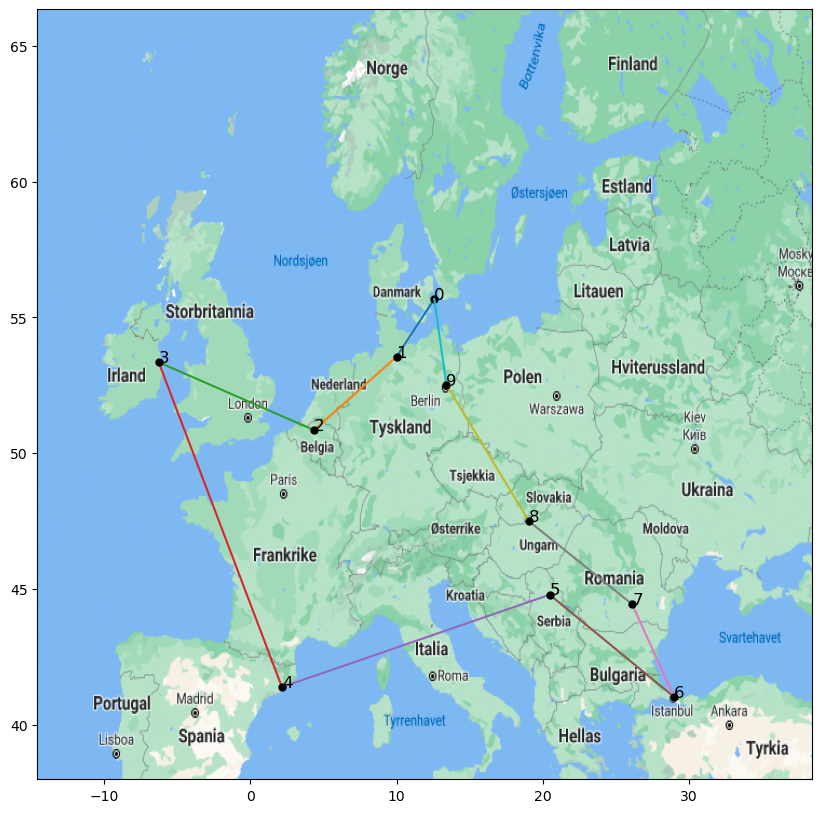

-> Population size = 100 - Best: 7486.309999999999, Worst: 7503.1, 
Mean: 7487.1494999999995, Std Dev: 3.6592956631025126, Runtime: 1.6043968796730042


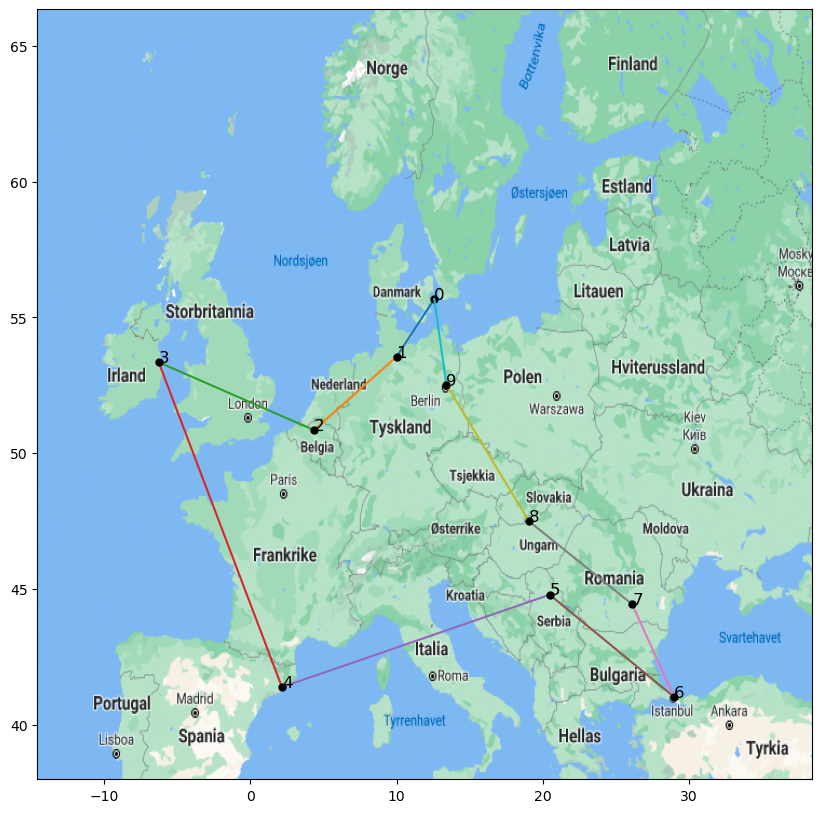

-> Population size = 150 - Best: 7486.309999999999, Worst: 7486.31, 
Mean: 7486.3099999999995, Std Dev: 4.981507640924666e-13, Runtime: 2.294896936416626


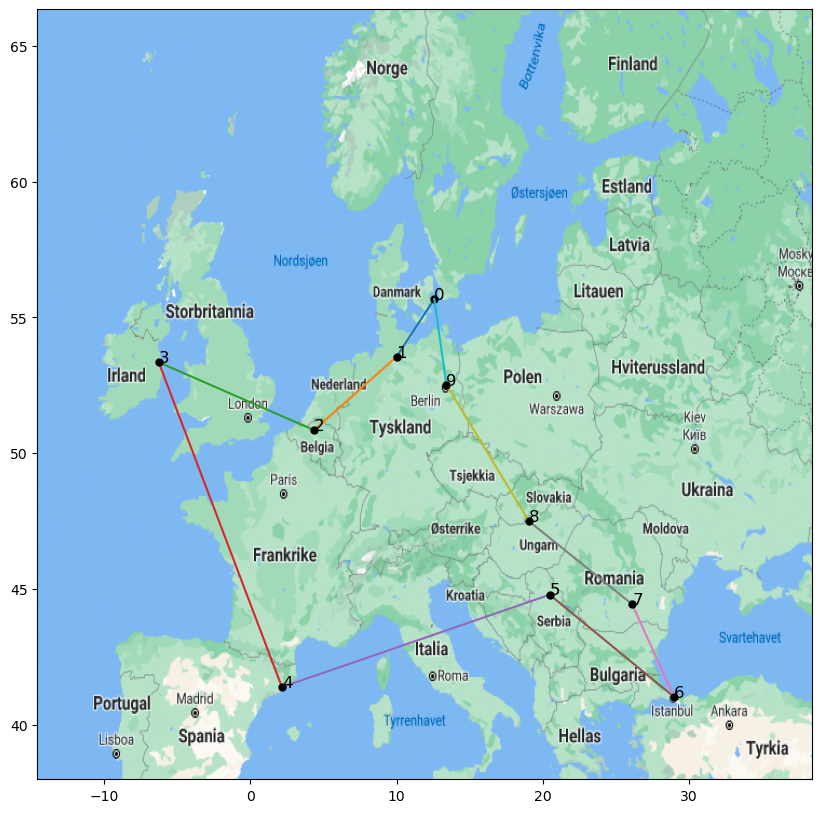

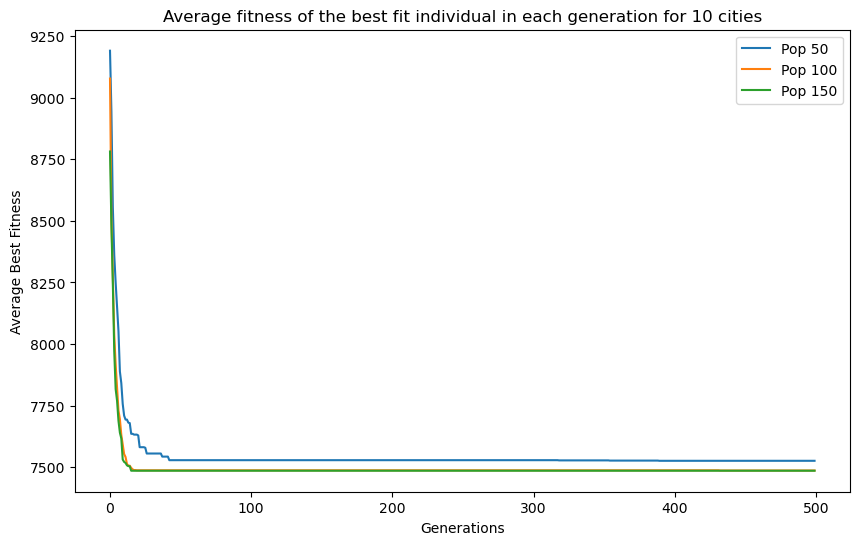

Genetic algorithm with 24 cities
-> Population size = 50 - Best: 12384.220000000003, Worst: 15769.910000000002, 
Mean: 13969.433500000003, Std Dev: 961.9319134183817, Runtime: 1.5896394848823547


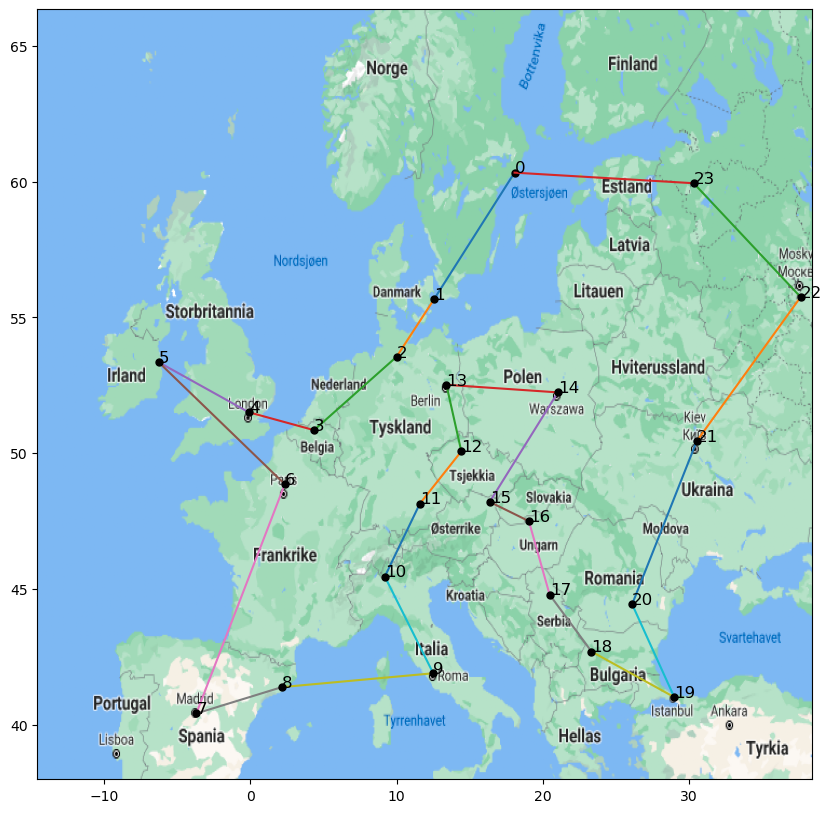

-> Population size = 100 - Best: 12431.499999999998, Worst: 15504.029999999999, 
Mean: 13528.945000000002, Std Dev: 804.2820415967276, Runtime: 2.841583049297333


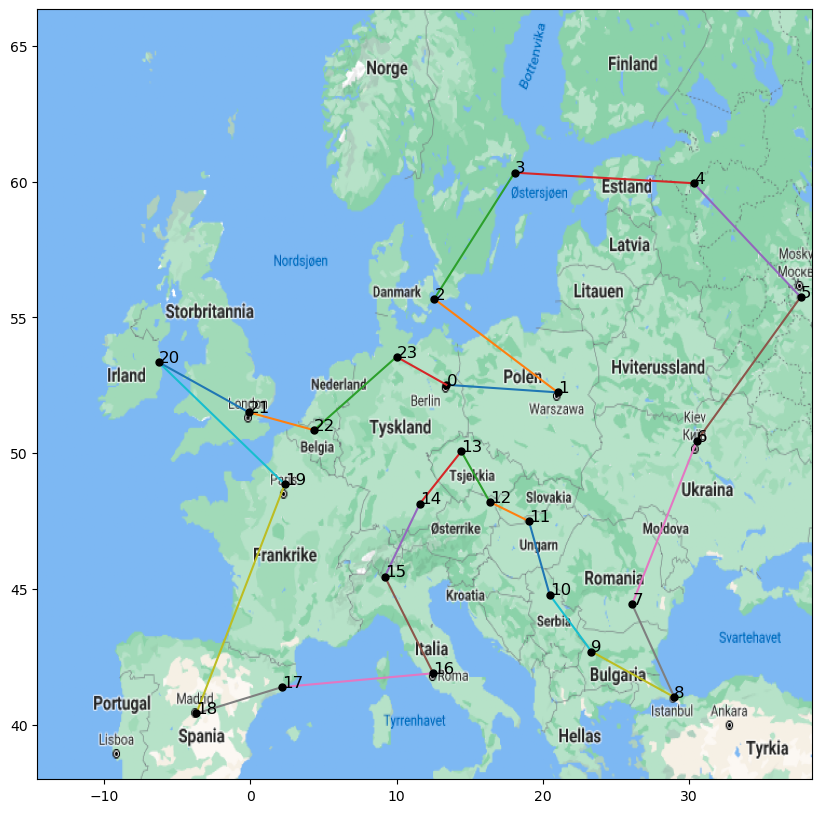

-> Population size = 150 - Best: 12325.930000000004, Worst: 14835.4, 
Mean: 13124.130000000001, Std Dev: 609.6410854347005, Runtime: 4.226737761497498


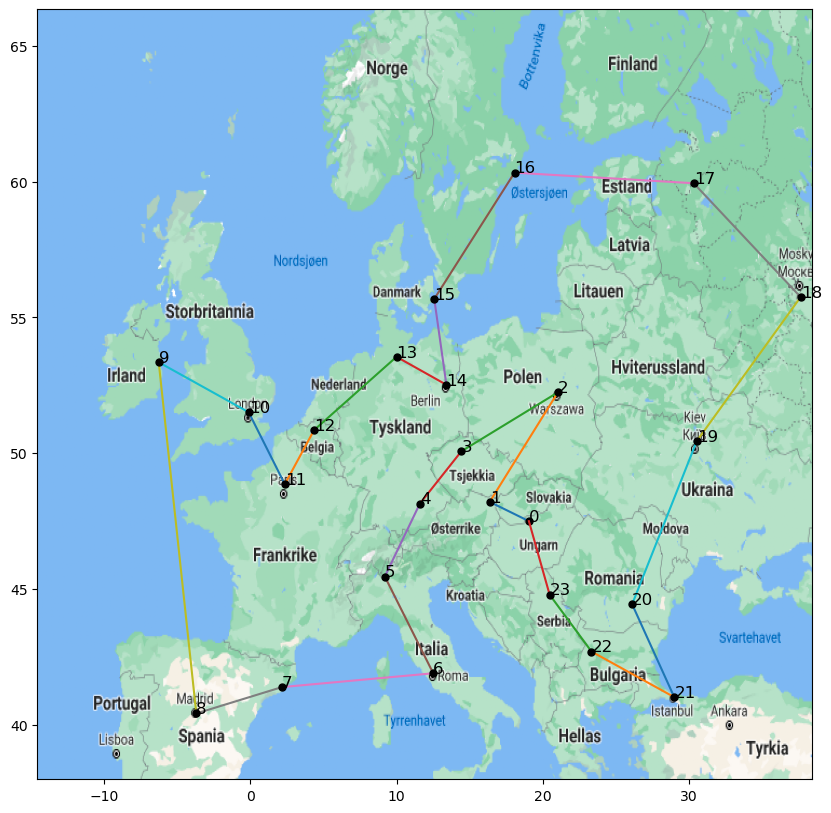

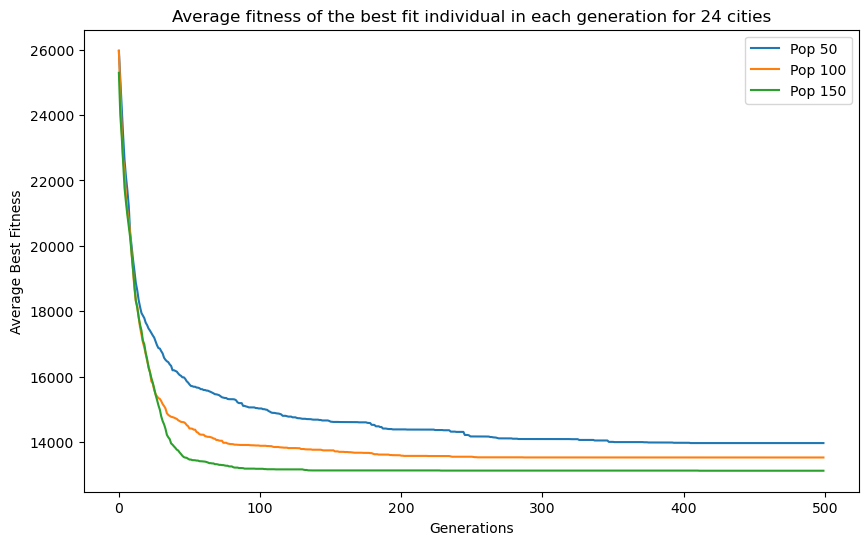

In [44]:
## 3 different population sizes
pop_sizes = [50, 100, 150]

#### using 10 cities
print("Genetic algorithm with 10 cities")
results = run_genetic_algorithm(20, data[0][:10], distances, pop_sizes) 
#print(results) 
for p in pop_sizes:
    print(f"-> Population size = {p} - Best: {results[p]["best"]}, Worst: {results[p]["worst"]}, \nMean: {results[p]["mean"]}, Std Dev: {results[p]["std"]}, Runtime: {results[p]["average runtime"]}")
    plot_plan(results[p]["best tour"])

## plotting fitness curves for the 3 different population sizes
plt.figure(figsize=(10, 6))
for p in pop_sizes:
    plt.plot(results[p]["fitness curve"], label=f'Pop {p}')
plt.xlabel("Generations")
plt.ylabel("Average Best Fitness")
plt.legend()
plt.title("Average fitness of the best fit individual in each generation for 10 cities")
plt.show() 


#### using 24 cities
print("Genetic algorithm with 24 cities")
results = run_genetic_algorithm(20, data[0], distances, pop_sizes) 
#print(results) 
for p in pop_sizes:
    print(f"-> Population size = {p} - Best: {results[p]["best"]}, Worst: {results[p]["worst"]}, \nMean: {results[p]["mean"]}, Std Dev: {results[p]["std"]}, Runtime: {results[p]["average runtime"]}")
    plot_plan(results[p]["best tour"])

## plotting fitness curves for the 3 different population sizes
plt.figure(figsize=(10, 6))
for p in pop_sizes:
    plt.plot(results[p]["fitness curve"], label=f'Pop {p}')
plt.xlabel("Generations")
plt.ylabel("Average Best Fitness")
plt.legend()
plt.title("Average fitness of the best fit individual in each generation for 24 cities")
plt.show()

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

Among the first 10 cities, my GA found the same shortest tour as the exhaustive search. 
The genetic algorithm has a much faster runtime compared to that of the exhaustive search - for both subsets of 10 and 24 cities - with 4.226737761497498 seconds as the slowest runtime for 24 cities and 2.294896936416626 for 10 cities. The best tour found by the GA  for 24 cities was with 150 as the population size and was 12325.930000000004 km long, thus making 150 the best population size. 

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 3)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [ ]:
# Implement algorithm here